# The Spark Foundation
## GRIPMAY21 Data Science & Business Analytics Internship 
### Name- Himanshu Gupta
## Task 1- Prediction using supervised ML
### Predict the percentage of an student based on the no. of study hours

In [24]:
# Importing libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [25]:
# Reading the data 
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [26]:
print(s_data.head(5)) # first 5 rows

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [28]:
#checking for null values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [30]:
#Pulling some information
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


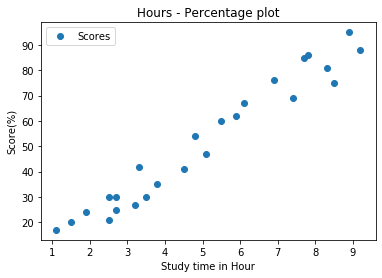

In [9]:
# plotting the raw dataset with label ,title
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours - Percentage plot')  
plt.xlabel('Study time in Hour')  
plt.ylabel('Score(%)')  
plt.show()

In [21]:
# seperating dataset into dependent and independent variable respectively(converting dataframe into numpy array)
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values
X.shape , y.shape 

((25, 1), (25,))

In [11]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0) # TEST SIZE =20%

In [12]:
# # Training the data using linear regression
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Plotting the regression line after fitting model ( Y= (slope)*X + intercept)
line = reg.coef_*X+reg.intercept_

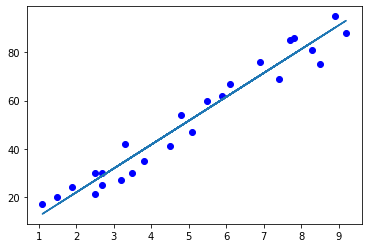

In [34]:
# Plotting for the test data
plt.scatter(X, y , color ="b") # b= blue , color of dots
plt.plot(X, line)
plt.show()

In [36]:
print(X_test)  # Testing data - In Hours
y_pred = reg.predict(X_test) #now predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [37]:
# Comparing the actual data with predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [48]:
# goodness of the fit test
from sklearn import metrics
print('accuracy of actual and predicted r-squared:', metrics.r2_score(y_test, y_pred))

accuracy of actual and predicted r-squared: 0.9454906892105356


In [50]:
# You can also test with your own data
#predicted score if a student studies for 9.25 hrs/ day?

hours = np.reshape(9.25,(1,-1))
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = [[9.25]]
Predicted Score = 93.69


Through the regression model, we can conclude that if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks

In [51]:
# Evaluating the performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less